Original Stochastic Differential Equation:

\begin{equation}
dS_t = \mu S_t dt + \sigma S_t dW_t
\end{equation}

Integrated form:

\begin{align*}
- \log S_t &= \log S_0 + \int_{t_0}^{t} \left( \mu - \frac{\sigma^2}{2} \right) ds + \int_{t_0}^{t} \sigma dW_s \\
- \log S_t &= \log S_0 + \left( \mu - \frac{\sigma^2}{2} \right) t + \sigma W_t \\
- \log S_t &\sim \mathcal{N} \left( \log S_0 + \left( \mu - \frac{\sigma^2}{2} \right) t, \sigma^2 t \right)
\end{align*}


Explicit expression:

\begin{equation}
S_t = S_0 e^{\left( \mu - \frac{\sigma^2}{2} \right) t + \sigma W_t}
\end{equation}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
def simulate_geometric_brownian_motion_paths(mu, n, T, M, S0, sigma, plot=False):
    dt = T / n
    # simulation using numpy arrays
    St = np.exp(
        (mu - sigma ** 2 / 2) * dt
        + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
    )

    # include array of 1's
    St = np.vstack([np.ones(M), St])

    # multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
    St = S0 * St.cumprod(axis=0)

    if plot:
        # Define time interval correctly 
        time = np.linspace(0,T,n+1)

        # Require numpy array that is the same shape as St
        tt = np.full(shape=(M,n+1), fill_value=time).T

        plt.plot(tt, St)
        plt.xlabel("Years $(t)$")
        plt.ylabel("Stock Price $(S_t)$")
        plt.title(
            f"Realizations of Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {S0}, \mu = {mu}, \sigma = {sigma}$"
        )
        plt.show()
    return St

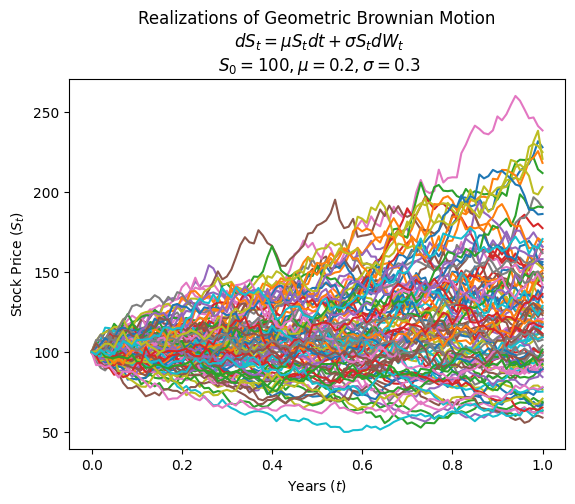

array([[100.        , 100.        , 100.        , ..., 100.        ,
        100.        , 100.        ],
       [102.47787702, 100.92079683, 104.06213502, ..., 100.62689185,
        100.36998662,  98.18449985],
       [102.51735607, 105.05821695, 103.42124741, ..., 100.22562908,
        102.56453162, 101.37073958],
       ...,
       [223.31084219, 107.80174112, 122.03109788, ..., 149.3393964 ,
        199.60145663, 166.54786018],
       [231.88141493, 108.55487995, 119.01850798, ..., 150.42674089,
        198.5550437 , 164.87011552],
       [228.12795857, 109.29102096, 117.85733251, ..., 145.90017157,
        203.18471252, 170.68073677]])

In [2]:
###### Example ######
# Parameters
# drift coefficent
mu = 0.2
# number of steps
n = 100
# time in years
T = 1
# number of sims
M = 100
# initial stock price
S0 = 100
# volatility
sigma = 0.3

simulate_geometric_brownian_motion_paths(mu, n, T, M, S0, sigma, plot=True)

Reference:
admin (n.d.). Simulating Geometric Brownian Motion (GBM) in Python – QuantPy. [online] Available at: https://quantpy.com.au/stochastic-calculus/simulating-geometric-brownian-motion-gbm-in-python/.